# Introduction and Preprocessing - Exercises

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Basic Informations

--- 
Load the macroeconomic_missing dataset from the csv file `macroeconomic_missing.csv`. 

This is a multivariate time series of US Macroeconomic Data. More info at https://www.statsmodels.org/dev/datasets/generated/macrodata.html.

In [2]:
df = pd.read_csv("data/macroeconomic_missing.csv", index_col=0)

---

Extract basic informations from the time series:
- shape of the time series
- number of channels
- number of points
- basic statistics
- missing values count

*hint: these are all methods of variables of the time series dataframe (`df.something` or `df.something()`)*

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 203 entries, 1959Q1 to 2009Q3
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   realgdp   203 non-null    float64
 1   realcons  203 non-null    float64
 2   realinv   203 non-null    float64
 3   realgovt  203 non-null    float64
 4   realdpi   203 non-null    float64
 5   cpi       203 non-null    float64
 6   m1        203 non-null    float64
 7   tbilrate  156 non-null    float64
 8   unemp     203 non-null    float64
 9   pop       203 non-null    float64
 10  infl      203 non-null    float64
 11  realint   203 non-null    float64
dtypes: float64(12)
memory usage: 20.6+ KB


In [4]:
df.describe()

,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,156.000000,203.000000,203.000000,203.000000,203.000000
mean,7221.171901,4825.293103,1012.863862,663.328640,5310.540887,105.075788,667.927586,5.275769,5.884729,239.724153,3.961330,1.336502
std,3214.956044,2313.346192,585.102267,140.863655,2423.515977,61.278878,455.346381,2.796672,1.458574,37.390450,3.253216,2.668799
min,2710.349000,1707.400000,259.764000,460.400000,1886.900000,28.980000,139.600000,0.120000,3.400000,177.146000,-8.790000,-6.790000
25%,4440.103500,2874.100000,519.147500,527.959500,3276.950000,41.050000,228.650000,3.495000,4.900000,208.631000,2.270000,-0.085000
50%,6559.594000,4299.900000,896.210000,662.412000,4959.400000,104.100000,540.900000,4.985000,5.700000,236.348000,3.240000,1.340000
75%,9629.346500,6398.150000,1436.681500,773.049000,6977.850000,159.650000,1102.100000,6.662500,6.800000,271.721500,4.975000,2.630000
max,13415.266000,9363.600000,2264.721000,1044.088000,10077.500000,218.610000,1673.900000,15.330000,10.700000,308.013000,14.620000,10.950000


In [5]:
df.isnull().sum()

realgdp      0
realcons     0
realinv      0
realgovt     0
realdpi      0
cpi          0
m1           0
tbilrate    47
unemp        0
pop          0
infl         0
realint      0
dtype: int64

In [10]:
df['tbilrate'].value_counts(dropna=False)

tbilrate
NaN     47
3.50     2
2.29     2
3.52     2
4.90     2
        ..
4.92     1
4.00     1
1.56     1
0.22     1
0.18     1
Name: count, Length: 149, dtype: int64

## Plots

---

Plot all channels in a single plot. Make sure that all the time series are readable using the appropriate scale. 

Does a logarithmic scale work in this case? Why?


<Axes: xlabel='Period'>

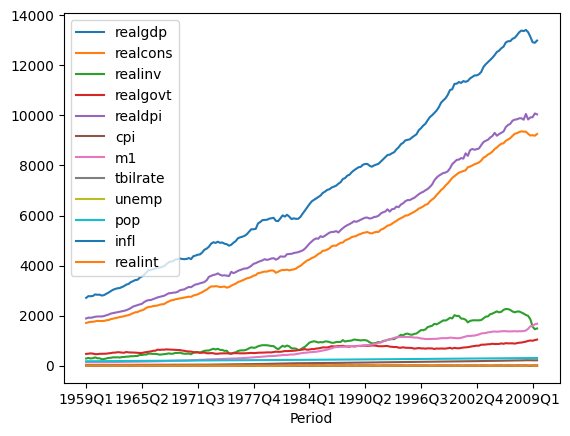

In [11]:
df.plot()

<Axes: xlabel='Period'>

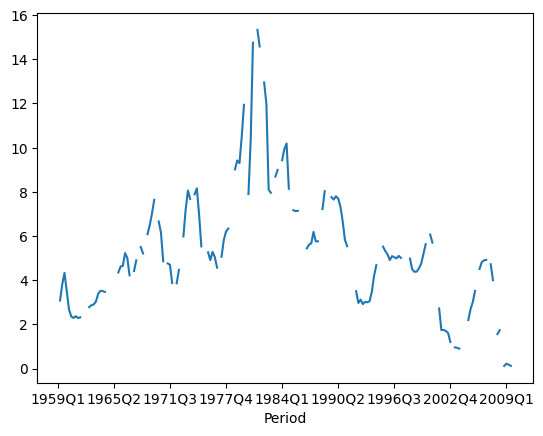

In [12]:
df['tbilrate'].plot()

---

Plot a boxplot of each channel. 

*hint: boxplot is a method of the dataframe*

<Axes: >

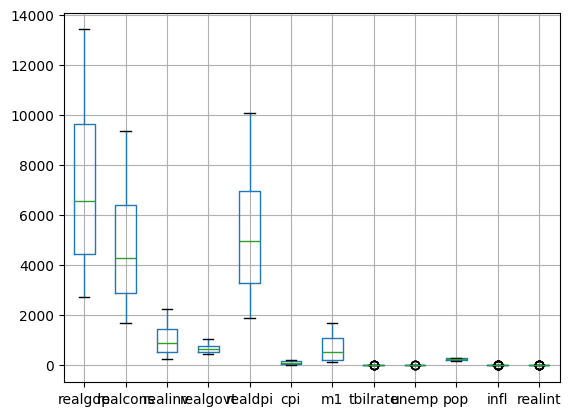

In [13]:
df.boxplot()

## Time Series manipulation

---

Save the channel `tbilrate` into the variable `ts1`, convert it into a numpy array and plot it. 
`tbilrate` is the quarterly monthly average of the monthly 3-month treasury bill: secondary market rate

*Do you notice something strange in the plot? What could be the reason for that?*

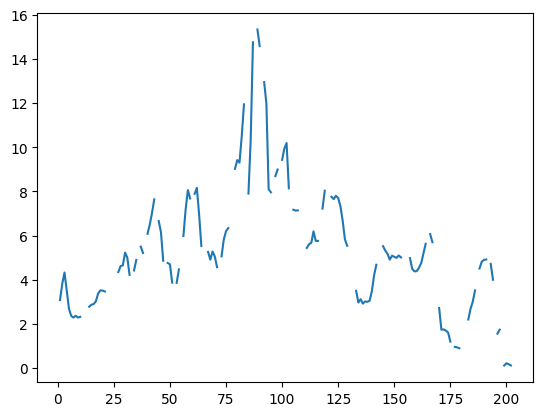

In [ ]:
ts1 = df['tbilrate'].values

plt.plot(ts1, label='Original Series')

## Missing Values

---

Fill the missing values of `tbilrate` using forward fill and plot the original and imputed time series in the same plot.

*bonus: try to use a different imputation method and compare the results*

In [24]:
from sktime.transformations.series.impute import Imputer

In [ ]:
imp_ff = Imputer(method='ffill')
ts1_ff = imp_ff.fit_transform(ts1)

---

Save the channel `infl` (inflation) in the variable `ts2`, converting it into a numpy array. Plot `ts1` (after imputation) and `ts2` in the same plot.

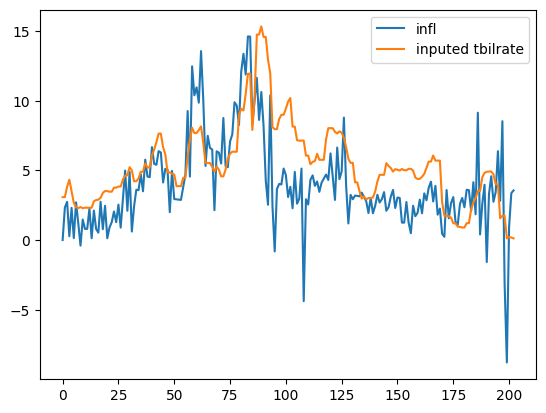

In [ ]:
ts2 = df['infl'].values
plt.plot(ts2, label='infl')
plt.plot(ts1_ff, label='inputed tbilrate')
plt.legend()
plt.show()

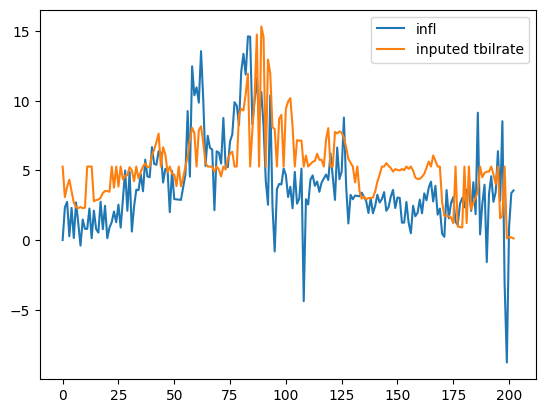

In [ ]:
imp_mean = Imputer(method='mean')
ts1_imputed_mean = imp_mean.fit_transform(ts1)
plt.plot(ts2, label='infl')
plt.plot(ts1_mean, label='inputed tbilrate')
plt.legend()
plt.show()

## Anomalies

---
`ts2` is very noisy, so try to find out if there are anomalies in the time series. Test at least two methods to detect anomalies and plot the time series with the detected anomalies.

*hint: don't go too heavy on the anomalies, try to find the ~5 most obvious ones*

In [37]:
from sktime.transformations.series.func_transform import FunctionTransformer

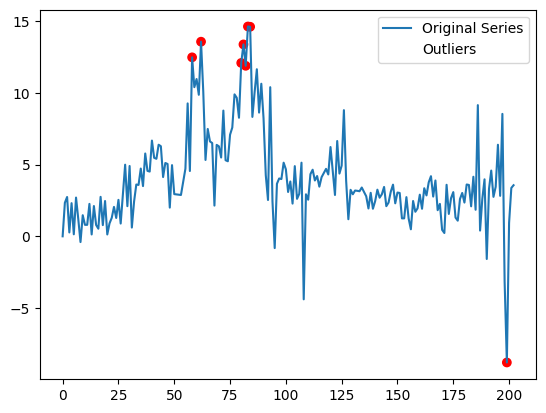

In [51]:
def iqr_outliers(ts, k=1.5):
    q1 = np.percentile(ts, 25)
    q3 = np.percentile(ts, 75)
    iqr = q3 - q1
    lower_bound = q1 - k * iqr
    upper_bound = q3 + k * iqr
    
    outliers = (ts < lower_bound) | (ts > upper_bound)
    return outliers

# again, we decrease the threshold to detect more outliers (default is 1.5)
transformer = FunctionTransformer(func=iqr_outliers, kw_args=dict(k=2.5), X_type="numpy3D")
outliers = transformer.fit_transform(ts2)
plt.plot(ts2, label='Original Series')
plt.scatter(np.arange(len(outliers)), ts2, color='red', alpha=outliers, label='Outliers')
plt.legend()

### Outlier replacement

---
Treat the anomalies you found as missing values, and use an imputation method to fill them. Plot the original and imputed time series in the same plot.

*hint: again, don't remove too many points, just the most extreme ones*

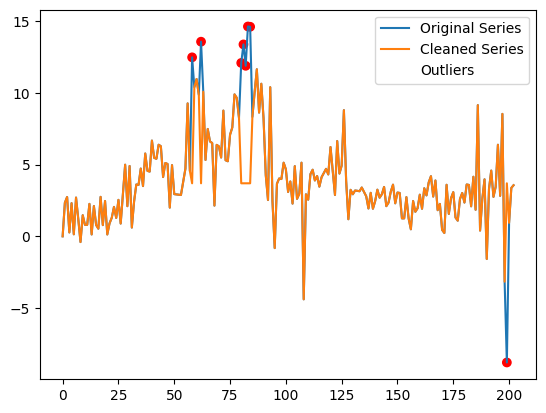

In [62]:
ts2_cleaned = ts2.copy()
ts2_cleaned[outliers.flatten()] = np.nan

imp_mean = Imputer(method='mean')
ts2_mean = imp_mean.fit_transform(ts2_cleaned)
plt.plot(ts2, label='Original Series')
plt.plot(ts2_mean, label='Cleaned Series')
plt.scatter(np.arange(len(outliers)), ts2, color='red', alpha=outliers, label='Outliers')
plt.legend()
plt.show()

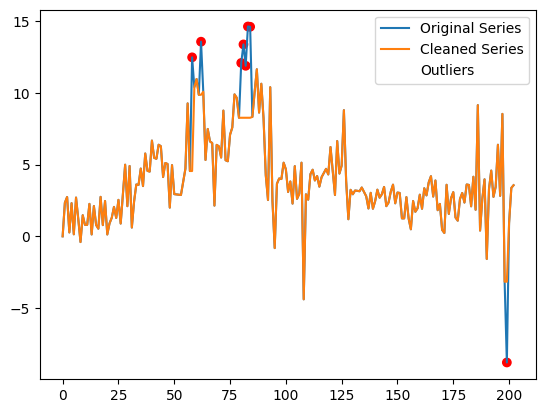

In [63]:
imp_ff = Imputer(method='ffill')
ts2_ff = imp_ff.fit_transform(ts2_cleaned)
plt.plot(ts2, label='Original Series')
plt.plot(ts2_ff, label='Cleaned Series')
plt.scatter(np.arange(len(outliers)), ts2, color='red', alpha=outliers, label='Outliers')
plt.legend()

## Normalizations

In [208]:
from sktime.transformations.series.adapt import TabularToSeriesAdaptor
from sklearn.preprocessing import StandardScaler

---

From the previous steps, you should have a `ts1_imputed` (after missing values replacement), and a `ts2_imputed` (after anomalies replacement). Convert them to the same scale and plot them. 

## Stationarity

In [212]:
from sktime.param_est.stationarity import StationarityADF
from statsmodels.tsa.stattools import adfuller
from sktime.transformations.series.difference import Differencer

---

- test if the two normalized time series are stationary
- try the same test after differencing the time series
- plot the autocorrelation of the differenced time series
- looking at the plots, what's the strongest seasonality in the time series? Do they have some seasonality component in common?

## Decompose the time series

In [222]:
from sktime.forecasting.trend import STLForecaster

---

- Decompose the normalized (not differenced) time series into trend, seasonal and residual components.

*hint: for the seasonality, use the strongest seasonality (>2) you found from the ACF plot. Each time series can have a different seasonality, so you will probably need to decompose them separately.*

- Plot the decomposed parts of time series.

- Now compare only the trends of the two time series.

## Discussion

---

Compare the first plot of the time series with the last plot of the trends. What can you say about the time series? 

Do they have similar trends?

What can you say about the seasonality of the time series?

What can you say about the residuals of the time series?

Did normalization help in comparing the time series?

## Bonus Exercise 1

In [228]:
def moving_average(x, w):
    return x.rolling(window=w).mean()

---
Can you perform all the steps above at once for `ts1`?

*hint: you can use a Pipeline to do that*

Start from `ts1` and then:
- impute missing values (Imputer)
- normalize the time series (TabularToSeriesAdaptor + a scaler of your choice)
- deseasonalize the time series (Deseasonalizer)
- smooth the time series (with a moving average)
- impute missing values (generated by the moving average)

Plot the original and the final time series.


## Bonus Exercise 2

Given the following time series (`time_series1`, `time_series2`, `time_series3`, `time_series4`, `time_series5`, make them stationary if necessary, using the appropriate transformations.

### Time Series 1

In [233]:
np.random.seed(0)
n = 100
x1 = np.linspace(0, 10, n)
noise1 = np.random.normal(0, 1, n)
time_series1 = pd.Series(x1 + noise1)

### Time Series 2

In [239]:
np.random.seed(1)
n = 120
x2 = 10 * np.sin(np.linspace(0, 3 * np.pi, n))
noise2 = np.random.normal(0, 1, n)
time_series2 = pd.Series(x2 + noise2)

### Time Series 3

In [241]:
np.random.seed(2)
n = 100
time_series3 = pd.Series(np.cumsum(np.random.normal(0, 1, n)))

### Time Series 4

In [246]:
np.random.seed(4)
n = 100
time_series4 = pd.Series(np.exp(np.linspace(0, 3, n)) + np.random.normal(0, 5, n)) + 1000

### Time Series 5

In [251]:
np.random.seed(4)
n = 150
x5 = np.linspace(0, 15, n)
sp = 5 * np.sin(np.linspace(0, 5 * np.pi, n))
noise5 = np.random.normal(0, 1, n)
time_series5 = pd.Series(x5 + sp + noise5)